# Diabetes predictive system

#### Import the required data analysis dependencies

In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

#### Import the required models . This is a supervised learning / classification problem.  

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score



#### Import model tuning and score metrics dependencies

In [3]:
from sklearn.preprocessing import StandardScaler # Standardizing our data
from sklearn.metrics import accuracy_score, confusion_matrix # Show how our model is performing 

#### Loading our dataset

In [4]:
diabetes_data = pd.read_csv(r'C:\Users\Scofield\MACHINE LEARNING PROJECTS\Diabetes Prediction Model\diabetes_dataset.csv')

diabetes_data.head().T


,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [5]:
diabetes_data.shape

(692, 9)

### We have 688 rows and 9 columns. Now we need to check the pairwise correlation using scatter plot from seaborn

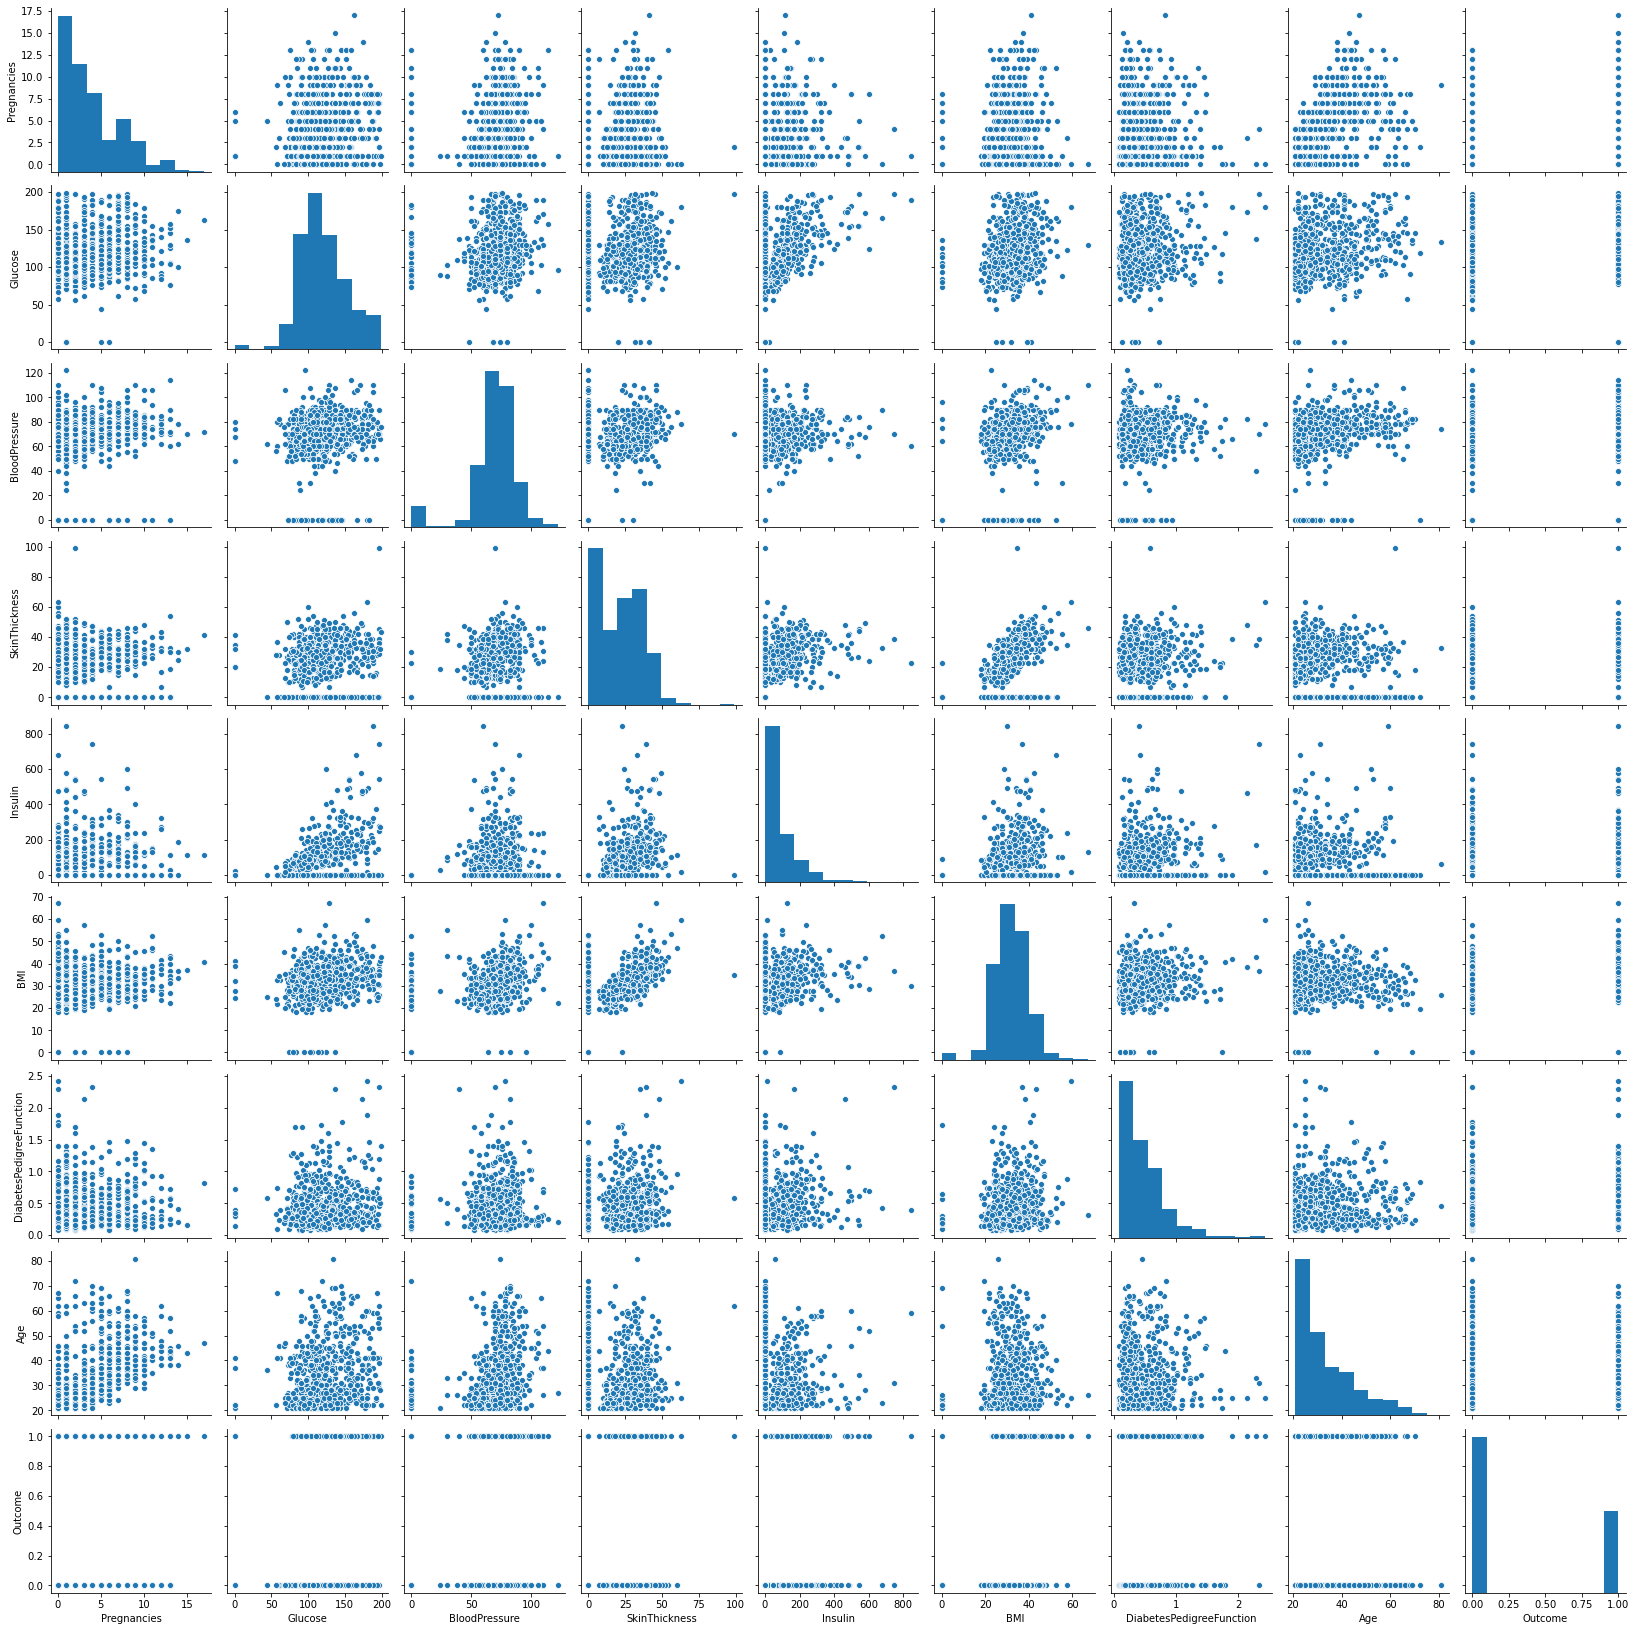

In [6]:
diabetes_data_scatter_plots = sns.pairplot(diabetes_data)
diabetes_data_scatter_plots

#### Check pairwise correlation of Pregnancies, BloodPressure, BMI , Age and Outcome 

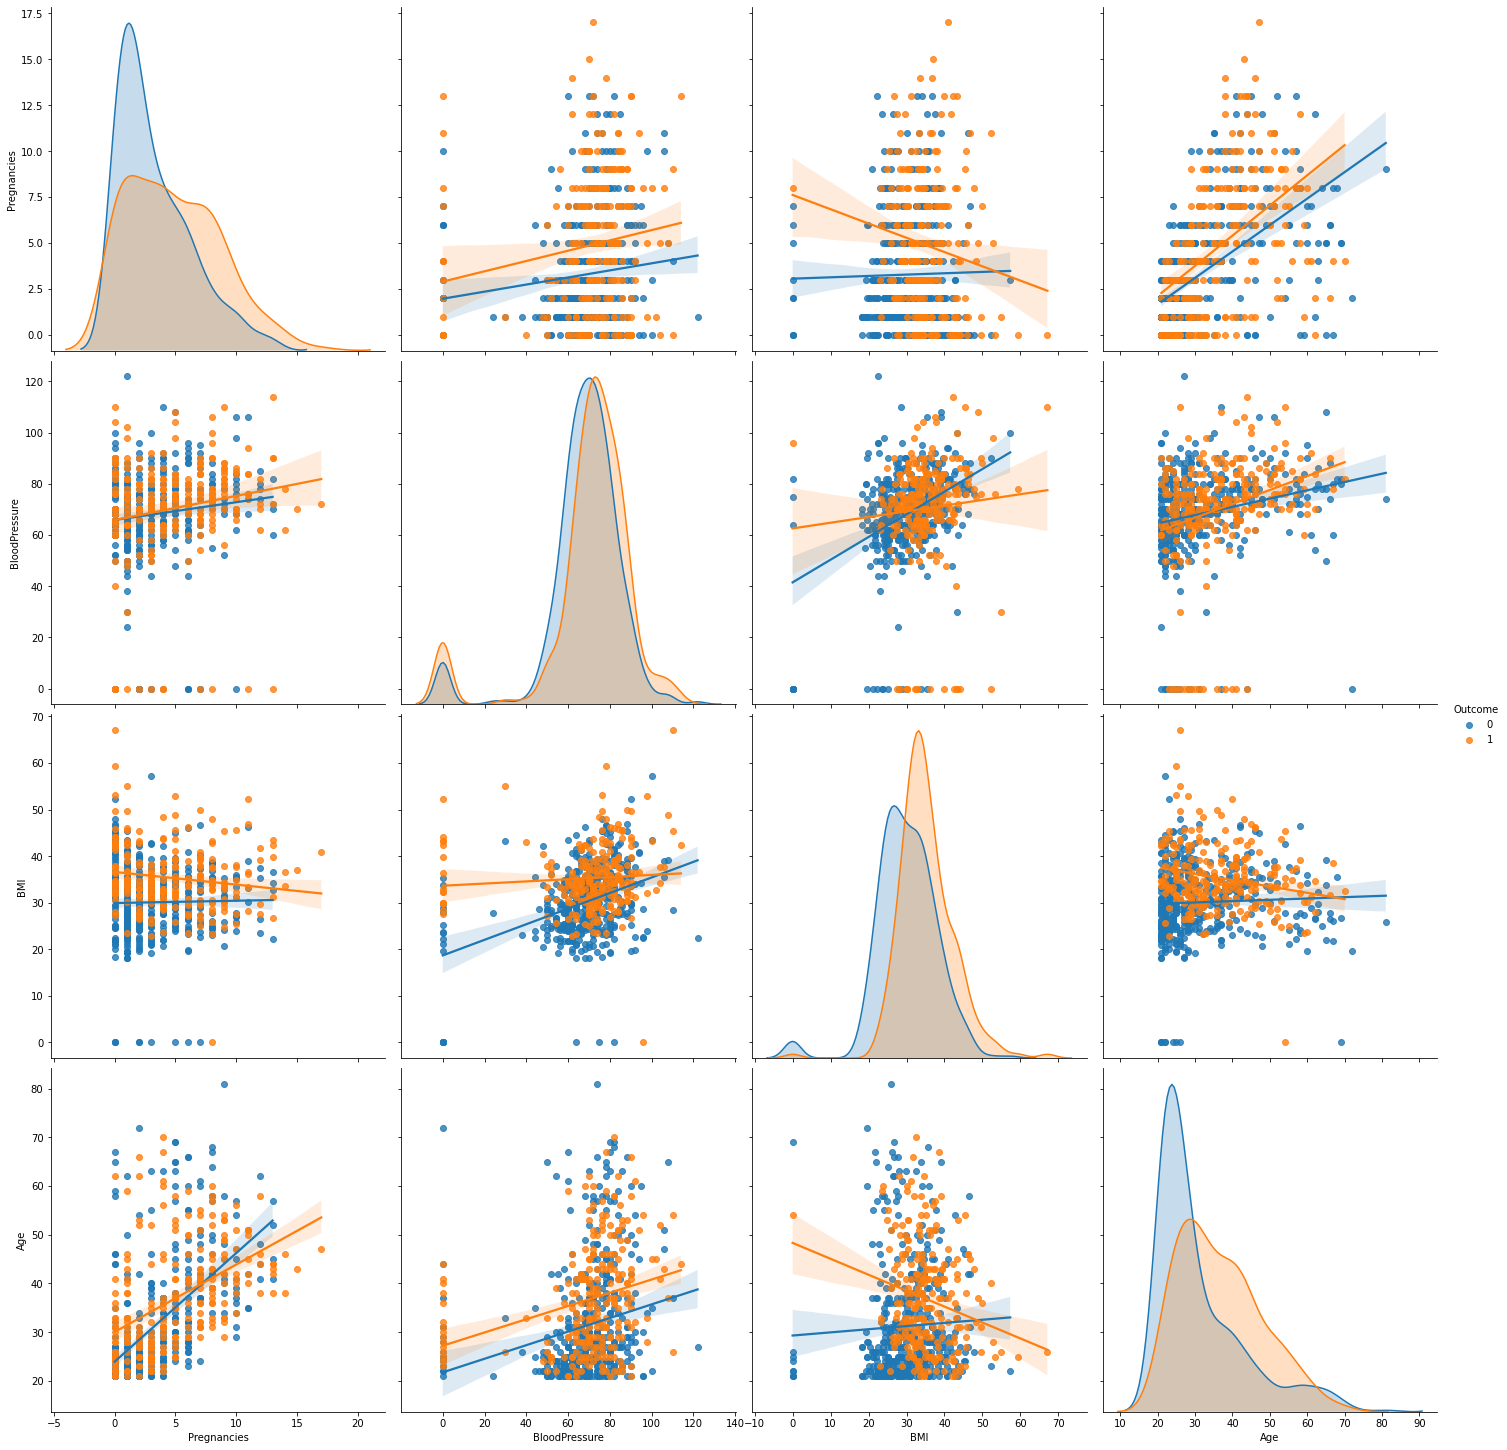

In [7]:
scatterplot = sns.pairplot(diabetes_data[['Pregnancies','BloodPressure','BMI','Age','Outcome']], hue='Outcome', height = 5, kind='reg')
scatterplot

#### Analyze pregnancies and check out the outliers

The median Pregnancies is :  3.0


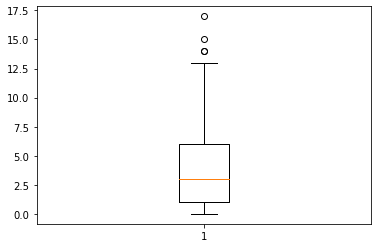

In [8]:
pregnancy_data = diabetes_data['Pregnancies'].values
pregnancy_data_box_plots = plt.boxplot(pregnancy_data)

print('The median Pregnancies is : ', diabetes_data['Pregnancies'].median() )

In [9]:
pregnancy_data_box_plots.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [10]:
for key in pregnancy_data_box_plots:
    print(f'{key}:{[item.get_ydata() for item in pregnancy_data_box_plots[key]]}')

whiskers:[array([1., 0.]), array([ 6., 13.])]
caps:[array([0., 0.]), array([13., 13.])]
boxes:[array([1., 1., 6., 6., 1.])]
medians:[array([3., 3.])]
fliers:[array([15, 17, 14, 14], dtype=int64)]
means:[]


#### As seen above, 14, 15 and 17 are outliers which ought to be removed from the dataset 

In [11]:
for outlier_pregnancy in pregnancy_data:
    if outlier_pregnancy > 13:
        print(outlier_pregnancy)

15
17
14
14


##### We remove the outliers by selecting the clean data using the loc function

In [12]:
diabetes_data = diabetes_data.loc[diabetes_data['Pregnancies'].values <14]

The median Pregnancies is :  3.0


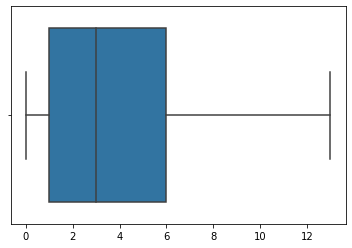

In [13]:
pregnancy_data = diabetes_data['Pregnancies'].values
pregnancy_data_box_plots = sns.boxplot(pregnancy_data)

print('The median Pregnancies is : ', diabetes_data['Pregnancies'].median() )

#### Get the dataset statistics using the describe function, value_counts to get the number of datapoints in a dataset group

In [14]:
# get the statistics of the whole group
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,3.764535,120.363372,68.915698,20.356105,79.255814,31.846366,0.476674,33.098837,0.340116
std,3.273522,32.269182,19.495049,16.037064,115.284907,7.971749,0.338236,11.822639,0.474093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,26.975000,0.240750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,22.500000,36.000000,32.000000,0.375500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.500000,36.325000,0.637000,40.000000,1.000000
max,13.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Convert the outcome from 1's and 0's to Yes or No 

In [15]:
#diabetes_data['Outcome'].replace({0:'N', 1:'Y'}, inplace=True)

In [16]:
# get the number of those with diabetes and those without
diabetes_data['Outcome'].value_counts()

0    454
1    234
Name: Outcome, dtype: int64

#### Get the mean of all data points and group them by outcome 

In [17]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.281938,109.817181,68.143172,19.486784,67.861233,30.091189,0.432907,31.257709
1,4.700855,140.824786,70.414530,22.042735,101.363248,35.251709,0.561590,36.670940


#### info() function shows the columns data types, number of null values and the number of dataset entries 

In [18]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 691
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               688 non-null    int64  
 1   Glucose                   688 non-null    int64  
 2   BloodPressure             688 non-null    int64  
 3   SkinThickness             688 non-null    int64  
 4   Insulin                   688 non-null    int64  
 5   BMI                       688 non-null    float64
 6   DiabetesPedigreeFunction  688 non-null    float64
 7   Age                       688 non-null    int64  
 8   Outcome                   688 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 53.8 KB


####  Get the number of unique values in each column

In [19]:
for column in diabetes_data:
    unique_values = np.unique(diabetes_data[column])
    number_of_column_features = len(unique_values)
    if number_of_column_features > 10:
        print(column, 'has ',number_of_column_features, 'values.' )
    else:
        print(column, 'has ',number_of_column_features, 'values.......',unique_values )
    

Pregnancies has  14 values.
Glucose has  131 values.
BloodPressure has  47 values.
SkinThickness has  51 values.
Insulin has  175 values.
BMI has  244 values.
DiabetesPedigreeFunction has  481 values.
Age has  52 values.
Outcome has  2 values....... [0 1]


#### Show pairwise correlations of the datapoints using a correlation matrix 

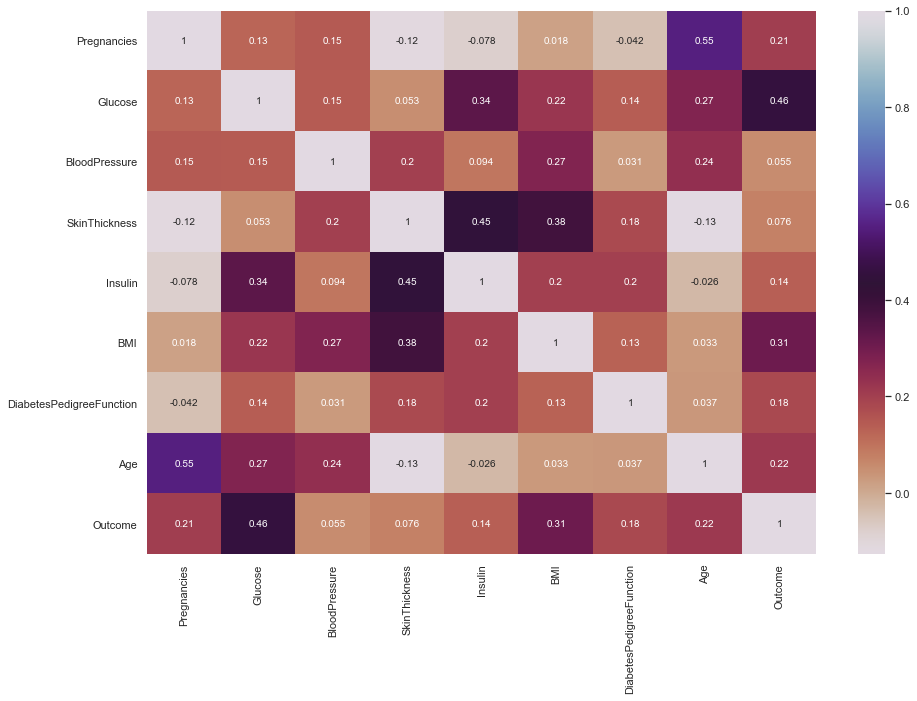

In [20]:
sns.set(rc={'figure.figsize':(15,10)})
ml_correlation_variables = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
peason_correlation = diabetes_data[ml_correlation_variables].corr(method='pearson')
cols = ml_correlation_variables
ax = sns.heatmap(peason_correlation, annot=True, yticklabels=cols, xticklabels=cols, annot_kws={'size':10}, cmap='twilight_r')

In [21]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127199,0.148357,-0.116989,-0.077791,0.018307,-0.041914,0.552015,0.205497
Glucose,0.127199,1.000000,0.145915,0.052812,0.335121,0.223484,0.141234,0.271082,0.455558
BloodPressure,0.148357,0.145915,1.000000,0.200524,0.094223,0.271244,0.031268,0.238344,0.055236
SkinThickness,-0.116989,0.052812,0.200524,1.000000,0.445251,0.383989,0.179941,-0.126906,0.075560
Insulin,-0.077791,0.335121,0.094223,0.445251,1.000000,0.201847,0.200510,-0.026119,0.137772
BMI,0.018307,0.223484,0.271244,0.383989,0.201847,1.000000,0.132046,0.033216,0.306904
DiabetesPedigreeFunction,-0.041914,0.141234,0.031268,0.179941,0.200510,0.132046,1.000000,0.036593,0.180369
Age,0.552015,0.271082,0.238344,-0.126906,-0.026119,0.033216,0.036593,1.000000,0.217073
Outcome,0.205497,0.455558,0.055236,0.075560,0.137772,0.306904,0.180369,0.217073,1.000000


#### Divide the data into X and Y and find feature importance using DecisionTreeRegressor

In [22]:
X = diabetes_data.drop(columns = 'Outcome', axis = 1)
Y = diabetes_data['Outcome']

print (X.shape, Y.shape)


(688, 8) (688,)


0 0.08005724402708106
1 0.3081038735557776
2 0.08714355497806282
3 0.04754593929720023
4 0.059939994363053264
5 0.12565177738835384
6 0.1783848727816555
7 0.11317274360881566


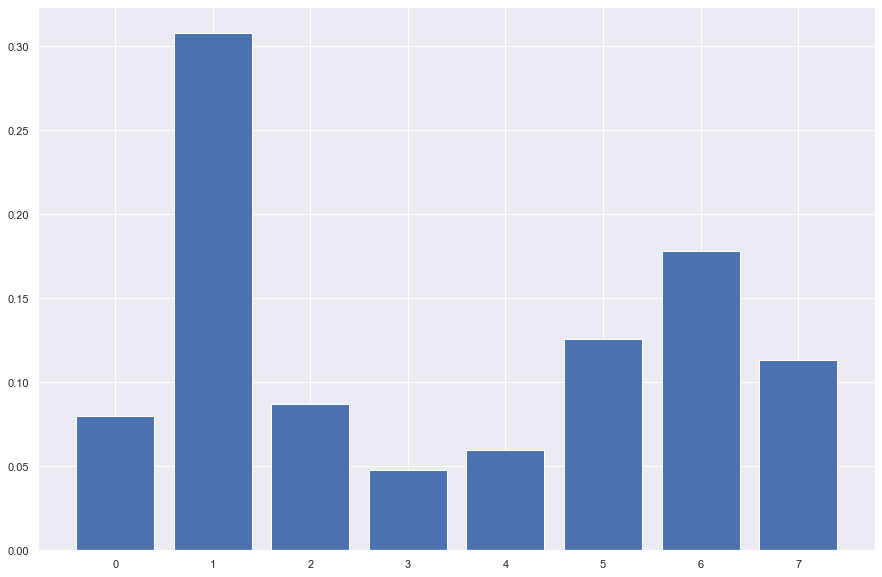

In [23]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance

for column,score in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
    print(column, score)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

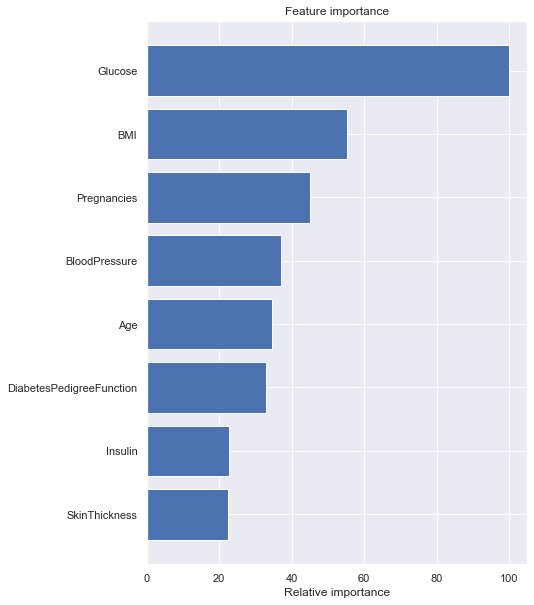

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y)
DT_classifier = DecisionTreeClassifier(random_state=20).fit(X_train, Y_train)
feature_importance =  DT_classifier.feature_importances_

feature_importance = 100*(feature_importance / feature_importance.max())

sorted_index = np.argsort(feature_importance)

pos = np.arange(sorted_index.shape[0]) + 5

plt.subplot(1,2,2)

plt.barh(pos, feature_importance[sorted_index], align = 'center')

plt.yticks(pos,diabetes_data.columns[sorted_index] )

plt.xlabel('Relative importance')

plt.title('Feature importance')

plt.show()

In [25]:
feature_importance

array([ 45.07976775, 100.        ,  36.90315074,  22.4859793 ,
        22.69198002,  55.38141445,  32.86822515,  34.58793406])

#### The 5 Important features are
    1. Glucose
    2. BMI
    3. DiabetesPedigreeFunction
    4. Age
    5. BloodPressure
    
### Our dataset is not that big so we are going to use all the features    

In [26]:
important_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = diabetes_data[important_features]
Y = diabetes_data['Outcome']

In [27]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
687,1,107,50,19,0,28.3,0.181,29
688,1,140,74,26,180,24.1,0.828,23
689,1,144,82,46,180,46.1,0.335,46
690,8,107,80,0,0,24.6,0.856,34


####  Scale the X values to a standard scale to avoid skewness 

In [28]:
scaler = StandardScaler()
scaler.fit(X)

standardized_diabetes_data = scaler.transform(X)

In [29]:
X = standardized_diabetes_data
X

array([[ 0.68338981,  0.8570634 ,  0.15832462, ...,  0.2201411 ,
         0.44476289,  1.43059932],
       [-0.84512836, -1.09668416, -0.14966974, ..., -0.65859868,
        -0.37182838, -0.17765612],
       [ 1.29479707,  1.94247871, -0.25233453, ..., -1.07286172,
         0.57790277, -0.0930111 ],
       ...,
       [-0.84512836,  0.73301594,  0.67164857, ...,  1.78931928,
        -0.41916701,  1.09201923],
       [ 1.29479707, -0.4144231 ,  0.56898378, ..., -0.90966719,
         1.12229695,  0.07627895],
       [ 2.82331524,  1.16718206,  2.31428519, ...,  1.31228911,
        -0.6499428 ,  0.92272918]])

#### Split the data using train_test_split from model_selection 

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y)

print(X_train.shape,  X_test.shape, Y_train.shape, Y_test.shape)

(550, 8) (138, 8) (550,) (138,)


#### The split is as follows:
            X        Y
    Train   611      611

    Test    153      153 


# Model selection

In [31]:
models = [
        DecisionTreeClassifier(),
        LogisticRegression(max_iter = 1000),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        SVC(kernel =  'linear')
]

#### Fit the models with data and evaluate their scores 

In [32]:
def compare_models_with_train_test_split():
    for model in models:
        model.fit(X_train, Y_train)
        predicted_values = model.predict(X_test)
        accuracy = accuracy_score(Y_test, predicted_values)
        print('Accuracy of ' , model , 'is ----', accuracy)

In [33]:
compare_models_with_train_test_split()

Accuracy of  DecisionTreeClassifier() is ---- 0.7101449275362319
Accuracy of  LogisticRegression(max_iter=1000) is ---- 0.7536231884057971
Accuracy of  KNeighborsClassifier() is ---- 0.7898550724637681
Accuracy of  RandomForestClassifier() is ---- 0.7681159420289855
Accuracy of  SVC(kernel='linear') is ---- 0.7463768115942029


#### Compare models with KFold cross validation 

In [34]:
def compare_models_with_cross_validation():
    for model in models:
        cv_score = cross_val_score(model, X, Y, cv=5)
        mean_accuracy = sum(cv_score) / len(cv_score)
        mean_accuracy = mean_accuracy * 100
        mean_accuracy = round(mean_accuracy, 2)
        print('Accuracy for ', model , 'is ', cv_score)
        print('Mean accuracy for ', model, 'is ', mean_accuracy, ' %')
        print('*****************************************************')
        

In [35]:
compare_models_with_cross_validation()

Accuracy for  DecisionTreeClassifier() is  [0.7173913  0.65217391 0.63768116 0.70072993 0.74452555]
Mean accuracy for  DecisionTreeClassifier() is  69.05  %
*****************************************************
Accuracy for  LogisticRegression(max_iter=1000) is  [0.77536232 0.76086957 0.76086957 0.75182482 0.79562044]
Mean accuracy for  LogisticRegression(max_iter=1000) is  76.89  %
*****************************************************
Accuracy for  KNeighborsClassifier() is  [0.7173913  0.73913043 0.76086957 0.7080292  0.75912409]
Mean accuracy for  KNeighborsClassifier() is  73.69  %
*****************************************************
Accuracy for  RandomForestClassifier() is  [0.76086957 0.72463768 0.77536232 0.77372263 0.78832117]
Mean accuracy for  RandomForestClassifier() is  76.46  %
*****************************************************
Accuracy for  SVC(kernel='linear') is  [0.76811594 0.76086957 0.76811594 0.74452555 0.7810219 ]
Mean accuracy for  SVC(kernel='linear') is  76

In [36]:
lm = sm.OLS(Y_train,X_train)
results = lm.fit()
results.params

x1    0.067533
x2    0.195742
x3   -0.055625
x4    0.006060
x5   -0.038108
x6    0.099777
x7    0.070392
x8    0.020822
dtype: float64

#### Draw the OLS regression summary sheet 

In [37]:
print (results.summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.203
Model:                            OLS   Adj. R-squared (uncentered):              0.191
Method:                 Least Squares   F-statistic:                              17.22
Date:                Wed, 09 Aug 2023   Prob (F-statistic):                    6.58e-23
Time:                        12:49:03   Log-Likelihood:                         -421.47
No. Observations:                 550   AIC:                                      858.9
Df Residuals:                     542   BIC:                                      893.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### The OLS summary shows how the performance of LinearRegression model. As it stands, it's not performing any better than other models.

### Check the confusion matrix of all models to see which one stands the best

In [38]:
def draw_confusion_matrix():
    for model in models:
        model.fit(X_train, Y_train)
        predicted_values = model.predict(X_test)
        cf_matrix = confusion_matrix(Y_test, predicted_values)
        tn, tp, fn, fp = cf_matrix.ravel()
        plt.figure(figsize=(8,4))
        sns.heatmap(cf_matrix, annot=True)
        
        plt.ylabel('True Values')
        plt.xlabel('Predicted Values')
        

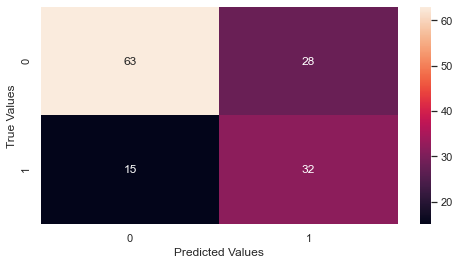

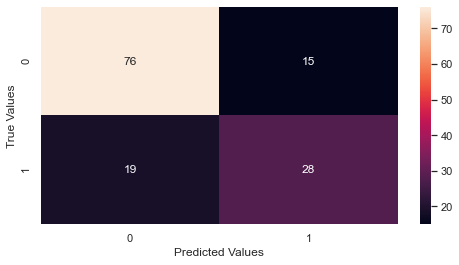

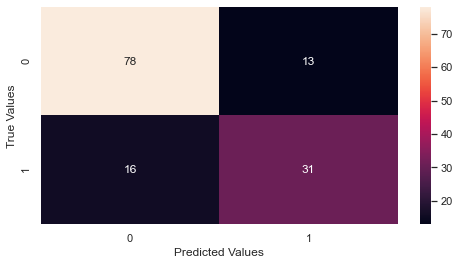

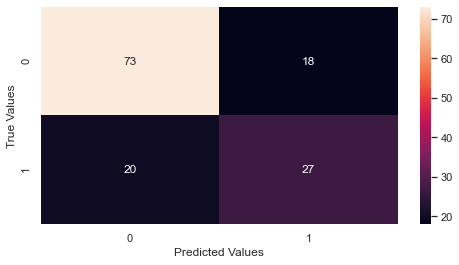

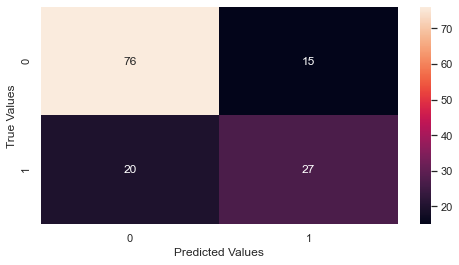

In [39]:
draw_confusion_matrix()

#### Below are the average results of the confusion matrices

     CLASSIFIER                 TRUE_PREDICTED    WRONG_PREDICTED
     
     DecisionTreeClassifier()          112            41
     LogisticRegression()              120            33
     KNeighborsClassifier()            114            39
     RandomForestClassifier            105            38
     SVC(kernel =  'linear')           119            34


### LogisticRegression() is the best as seen above, so we select it as our production model 

In [40]:
    production_model =  LogisticRegression(max_iter=1000)
    cv_score = cross_val_score(production_model, X, Y, cv=5)
    mean_accuracy = sum(cv_score) / len(cv_score)
    mean_accuracy = mean_accuracy * 100
    mean_accuracy = round(mean_accuracy, 2)
    print('Accuracy for ', production_model , 'is ', cv_score)
    print('Mean accuracy for ', production_model, 'is ', mean_accuracy, ' %')
    print('*****************************************************')
       

Accuracy for  LogisticRegression(max_iter=1000) is  [0.77536232 0.76086957 0.76086957 0.75182482 0.79562044]
Mean accuracy for  LogisticRegression(max_iter=1000) is  76.89  %
*****************************************************


# Saving the model for deployment

In [41]:
import pickle

filename = 'Diabetes_Prediction_System.sav'

pickle.dump(production_model, open(filename, 'wb')) # wb means write binary ---- 


In [42]:
# loading the model

diabetes_prediction_model = pickle.load(open('Diabetes_Prediction_System.sav', 'rb')) # rb means read binary 


In [43]:
diabetes_prediction_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

# Model Testing

In [44]:
unseen_test_data = [
    [2,121,70,32,95,39.1,0.886,23],
    [7,129,68,49,125,38.5,0.439,43],
    [2,90,60,0,0,23.5,0.191,25],
    [7,142,90,24,480,30.4,0.128,43],
    [3,169,74,19,125,29.9,0.268,31],
    [0,99,0,0,0,25,0.253,22],
    [4,127,88,11,155,34.5,0.598,28],
    [4,118,70,0,0,44.5,0.904,26],
    [2,122,76,27,200,35.9,0.483,26],
    [6,125,78,31,0,27.6,0.565,49],
    [1,168,88,29,0,35,0.905,52],
    [2,129,0,0,0,38.5,0.304,41],
    [4,110,76,20,100,28.4,0.118,27],
    [6,80,80,36,0,39.8,0.177,28],
    [10,115,0,0,0,0,0.261,30],
    [2,127,46,21,335,34.4,0.176,22],
    [9,164,78,0,0,32.8,0.148,45],
    [2,93,64,32,160,38,0.674,23],
    [3,158,64,13,387,31.2,0.295,24],
    [5,126,78,27,22,29.6,0.439,40],
    [10,129,62,36,0,41.2,0.441,38],
    [0,134,58,20,291,26.4,0.352,21],
    [3,102,74,0,0,29.5,0.121,32],
    [7,187,50,33,392,33.9,0.826,34],
    [3,173,78,39,185,33.8,0.97,31],
    [10,94,72,18,0,23.1,0.595,56],
    [1,108,60,46,178,35.5,0.415,24],
    [5,97,76,27,0,35.6,0.378,52],
    [4,83,86,19,0,29.3,0.317,34],
    [1,114,66,36,200,38.1,0.289,21],
    [1,149,68,29,127,29.3,0.349,42],
    [5,117,86,30,105,39.1,0.251,42],
    [1,111,94,0,0,32.8,0.265,45],
    [4,112,78,40,0,39.4,0.236,38],
    [1,116,78,29,180,36.1,0.496,25],
    [0,141,84,26,0,32.4,0.433,22],
    [2,175,88,0,0,22.9,0.326,22],
    [2,92,52,0,0,30.1,0.141,22],
    [3,130,78,23,79,28.4,0.323,34],
    [8,120,86,0,0,28.4,0.259,22],
    [2,174,88,37,120,44.5,0.646,24],
    [2,106,56,27,165,29,0.426,22],
    [2,105,75,0,0,23.3,0.56,53],
    [4,95,60,32,0,35.4,0.284,28],    
    [0,126,86,27,120,27.4,0.515,21],
    [8,65,72,23,0,32,0.6,42],
    [2,99,60,17,160,36.6,0.453,21],
    [1,102,74,0,0,39.5,0.293,42],
    [11,120,80,37,150,42.3,0.785,48],
    [3,102,44,20,94,30.8,0.4,26],
    [1,109,58,18,116,28.5,0.219,22],
    [9,140,94,0,0,32.7,0.734,45],
    [13,153,88,37,140,40.6,1.174,39],
    [12,100,84,33,105,30,0.488,46],
    [1,147,94,41,0,49.3,0.358,27],
    [1,81,74,41,57,46.3,1.096,32],
    [3,187,70,22,200,36.4,0.408,36],
    [6,162,62,0,0,24.3,0.178,50],
    [4,136,70,0,0,31.2,1.182,22],
    [1,121,78,39,74,39,0.261,28],
    [3,108,62,24,0,26,0.223,25],
    [0,181,88,44,510,43.3,0.222,26],
    [8,154,78,32,0,32.4,0.443,45],
    [1,128,88,39,110,36.5,1.057,37],
    [7,137,90,41,0,32,0.391,39],
    [0,123,72,0,0,36.3,0.258,52],
    [1,106,76,0,0,37.5,0.197,26],
    [6,190,92,0,0,35.5,0.278,66],
    [2,88,58,26,16,28.4,0.766,22],
    [9,170,74,31,0,44,0.403,43],
    [9,89,62,0,0,22.5,0.142,33],
    [10,101,76,48,180,32.9,0.171,63],
    [2,122,70,27,0,36.8,0.34,27],
    [5,121,72,23,112,26.2,0.245,30],
    [1,126,60,0,0,30.1,0.349,47],
    [1,93,70,31,0,30.4,0.315,23]
]

In [45]:
def test_unseen_data():
    for input_data in unseen_test_data:
        input_data_as_numpy_array = np.asarray(input_data)
        reshaped_input_data = input_data_as_numpy_array.reshape(1, -1)
        std_data = scaler.transform(reshaped_input_data)
        prediction = diabetes_prediction_model.predict(std_data)
        print(prediction)
        if prediction[0]==0:
            print('This person is healthy')
            print('*****************************')
        else:
            print('This person is diabetic')
            print('*****************************')
    


### Moment of truth

In [46]:
test_unseen_data()

[1]
This person is diabetic
*****************************
[1]
This person is diabetic
*****************************
[0]
This person is healthy
*****************************
[0]
This person is healthy
*****************************
[1]
This person is diabetic
*****************************
[0]
This person is healthy
*****************************
[0]
This person is healthy
*****************************
[1]
This person is diabetic
*****************************
[0]
This person is healthy
*****************************
[0]
This person is healthy
*****************************
[1]
This person is diabetic
*****************************
[1]
This person is diabetic
*****************************
[0]
This person is healthy
*****************************
[0]
This person is healthy
*****************************
[0]
This person is healthy
*****************************
[0]
This person is healthy
*****************************
[1]
This person is diabetic
*****************************
[0]
This person is healt

# Prediction analysis
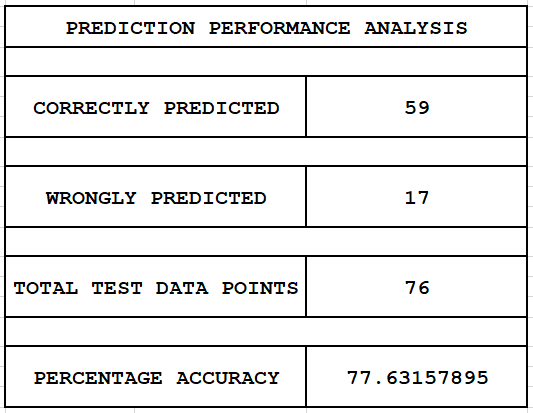

# The accuracy is quite similar to the one for training dataset which was 76.89%.
